## TRABALHO DE MACHINE LEARNING FOUNDATIONS

### GRUPO 6

Carlos Menezes de Oliveira

Eduardo Gaspar de Sousa

Leonardo de Souza Silva

Murilo Santone de Menezes

Renato Gonçalves da Costa

In [1]:
!pip install efficient-apriori
!pip install pyfpgrowth

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
from efficient_apriori import apriori
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfpgrowth
from sklearn.datasets import load_digits, load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Regras de associação

## Primeiros passos

### Buscando dados

[dataset](https://www.kaggle.com/datasets/mathchi/online-retail-data-set-from-ml-repository)

In [3]:
transactions = pd.read_csv("./retail_dataset.csv")

In [4]:
transactions.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [5]:
transactions_list = transactions.values.tolist()

transactions_list[0:5]

[['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine', nan, nan],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine', nan, nan],
 ['Meat', 'Pencil', 'Wine', nan, nan, nan, nan]]

In [6]:
transactions_list = transactions.values.tolist()

clean_rows = []
for row in transactions_list:
    clean_row = [item for item in row if item is not np.nan]

    clean_rows.append(clean_row)

In [7]:
itemsets, rules = apriori(clean_rows, min_support = 0.1, min_confidence=0.7)

rules_rhs = filter(lambda rule: len(rule.lhs) >= 1 and len(rule.rhs) >= 1, rules)


for rule in rules_rhs:
    print(rule)

{Bagel, Milk} -> {Bread} (conf: 0.761, supp: 0.171, lift: 1.507, conv: 2.068)
{Diaper, Milk} -> {Bread} (conf: 0.735, supp: 0.114, lift: 1.456, conv: 1.867)
{Eggs, Meat} -> {Cheese} (conf: 0.810, supp: 0.216, lift: 1.614, conv: 2.617)
{Cheese, Eggs} -> {Meat} (conf: 0.723, supp: 0.216, lift: 1.519, conv: 1.894)
{Eggs, Milk} -> {Cheese} (conf: 0.805, supp: 0.197, lift: 1.605, conv: 2.559)
{Meat, Milk} -> {Cheese} (conf: 0.831, supp: 0.203, lift: 1.657, conv: 2.952)
{Milk, Wine} -> {Cheese} (conf: 0.739, supp: 0.162, lift: 1.474, conv: 1.911)
{Meat, Milk} -> {Eggs} (conf: 0.727, supp: 0.178, lift: 1.660, conv: 2.060)
{Eggs, Milk} -> {Meat} (conf: 0.727, supp: 0.178, lift: 1.527, conv: 1.921)
{Eggs, Pencil} -> {Wine} (conf: 0.731, supp: 0.121, lift: 1.668, conv: 2.087)
{Eggs, Meat, Milk} -> {Cheese} (conf: 0.857, supp: 0.152, lift: 1.709, conv: 3.489)
{Cheese, Meat, Milk} -> {Eggs} (conf: 0.750, supp: 0.152, lift: 1.712, conv: 2.248)
{Cheese, Eggs, Milk} -> {Meat} (conf: 0.774, supp: 0.15

### Perguntas

1. O que acontece se mudarmos o valor mínimo de suporte?
1. Qual o valor mínimo de confiança?
1. Qual o valor mínimo de lift usado?
1. Como a confiança, suporte e lift mudam quando adicionamos mais elementos nas regras?

### Respostas

1. Aumentar o suporte mínimo faz com que o algoritmo encontre menos regras, pois ele só considera combinações de itens que ocorrem com maior frequência. Isso tende a reduzir o número de padrões descobertos, focando em regras mais concretas.<br>Diminuir o suporte mínimo faz com que o algoritmo exiba o que ocorre menos frequentemente, o que pode gerar mais regras, incluindo padrões menos comuns.

2. A confiança mínima não tem um valor fixo, mas é um parâmetro definido pelo usuário para garantir que as regras geradas sejam fortes o suficiente.

3. O lift também não tem um valor mínimo padrão; ele é calculado automaticamente como parte do processo de geração de regras, mas é interessante usar lift > 1 pois exibe uma maior correlação entre os itens.

4. Suporte: Diminui, pois é menos frequente que uma combinação maior de itens ocorra juntas. <br>
Confiança: Geralmente diminui, já que a probabilidade de todos os itens ocorrerem juntos é menor. <br>
Lift: Pode aumentar ou diminuir dependendo da relação entre os novos itens; ele reflete a força da associação ajustada pela frequência dos itens adicionais.

## Trabalhando com dados mais próximos do real

###  Agora vamos explorar dados simulados de uma loja de mercado, ver [dataset kaggle](https://www.kaggle.com/datasets/prasad22/retail-transactions-dataset)

In [4]:
retail_transactions = pd.read_csv("./Retail_Transactions_Dataset.csv")

In [5]:
retail_transactions.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [6]:
transacao_retail = retail_transactions.head(300)

In [7]:
transacao_retail['Product'] = transacao_retail['Product'].str.replace('[',"")
transacao_retail['Product'] = transacao_retail['Product'].str.replace("'","")
transacao_retail['Product'] = transacao_retail['Product'].str.replace(']',"")
transacao_retail['Product'] = transacao_retail['Product'].str.replace(' ',"")
transacao_retail['Product'] = transacao_retail['Product'].str.split(",").to_list()

C:\Users\Uso Pessoal\AppData\Local\Temp\ipykernel_11984\2466367362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transacao_retail['Product'] = transacao_retail['Product'].str.replace('[',"")
C:\Users\Uso Pessoal\AppData\Local\Temp\ipykernel_11984\2466367362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transacao_retail['Product'] = transacao_retail['Product'].str.replace("'","")
C:\Users\Uso Pessoal\AppData\Local\Temp\ipykernel_11984\2466367362.py:3: SettingWithCopyWarning: 
A value is trying to

In [8]:
retail_to_list = transacao_retail['Product'].tolist()

retail_to_list[0:5]

[['Ketchup', 'ShavingCream', 'LightBulbs'],
 ['IceCream', 'Milk', 'OliveOil', 'Bread', 'Potatoes'],
 ['Spinach'],
 ['Tissues', 'Mustard'],
 ['DishSoap']]

In [9]:
clean_rows = []

for row in retail_to_list:
    clean_row = [item for item in row if item is not np.nan]

    clean_rows.append(clean_row)

In [10]:
itemsets, rules = apriori(clean_rows, min_support = 0.01, min_confidence=0.5)

rules_rhs = filter(lambda rule: len(rule.lhs) >= 1 and len(rule.rhs) >= 1, rules)


for rule in rules_rhs:
    print(rule)

{PlantFertilizer} -> {Tuna} (conf: 0.500, supp: 0.013, lift: 10.714, conv: 1.907)


In [11]:
# Encontrando padrões frequentes com suporte mínimo de 0.4

padrao = pyfpgrowth.find_frequent_patterns(retail_to_list, 0.4)
print("Padrão frequente: ", padrao)

Padrão frequente:  {('Dishware', 'Pickles'): 1, ('Dishware', 'Eggs'): 1, ('Bread', 'Dishware'): 1, ('Bread', 'Dishware', 'Eggs'): 1, ('Dishware', 'Toothpaste'): 1, ('Bread', 'Dishware', 'Toothpaste'): 1, ('Dishware', 'Eggs', 'Toothpaste'): 1, ('Bread', 'Dishware', 'Eggs', 'Toothpaste'): 1, ('Dishware', 'TrashBags'): 1, ('Dishware', 'Soap', 'TrashBags'): 1, ('Dishware', 'Shampoo'): 1, ('Dishware', 'Shampoo', 'TrashBags'): 1, ('Dishware', 'Shampoo', 'Soap'): 1, ('Dishware', 'Shampoo', 'Soap', 'TrashBags'): 1, ('Chips', 'Dishware'): 1, ('Chips', 'Dishware', 'Shampoo'): 1, ('Chips', 'Dishware', 'TrashBags'): 1, ('Chips', 'Dishware', 'Soap'): 1, ('Chips', 'Dishware', 'Shampoo', 'TrashBags'): 1, ('Chips', 'Dishware', 'Shampoo', 'Soap'): 1, ('Chips', 'Dishware', 'Soap', 'TrashBags'): 1, ('Chips', 'Dishware', 'Shampoo', 'Soap', 'TrashBags'): 1, ('Apple', 'Dishware'): 1, ('Dishware', 'InsectRepellent'): 1, ('Apple', 'Dishware', 'InsectRepellent'): 1, ('Dishware', 'Soap'): 2, ('Diapers', 'Soda')

In [12]:
# Gerando regras de associação com confiança mínima de 70%

regras = pyfpgrowth.generate_association_rules(padrao, 0.7)
print("Regras de Associação:", regras)

Regras de Associação: {('Bread', 'Dishware'): (('Eggs', 'Toothpaste'), 1.0), ('Bread', 'Eggs'): (('Toothpaste',), 1.0), ('Dishware', 'Eggs'): (('Bread', 'Toothpaste'), 1.0), ('Dishware', 'Toothpaste'): (('Bread', 'Eggs'), 1.0), ('Eggs', 'Toothpaste'): (('Bread',), 1.0), ('Bread', 'Dishware', 'Eggs'): (('Toothpaste',), 1.0), ('Bread', 'Dishware', 'Toothpaste'): (('Eggs',), 1.0), ('Bread', 'Eggs', 'Toothpaste'): (('Dishware',), 1.0), ('Dishware', 'Eggs', 'Toothpaste'): (('Bread',), 1.0), ('Dishware', 'TrashBags'): (('Chips', 'Shampoo', 'Soap'), 1.0), ('Soap', 'TrashBags'): (('Chips', 'Shampoo'), 1.0), ('Dishware', 'Shampoo'): (('Chips', 'Soap', 'TrashBags'), 1.0), ('Shampoo', 'TrashBags'): (('Chips', 'Soap'), 1.0), ('Dishware', 'Shampoo', 'Soap'): (('Chips', 'TrashBags'), 1.0), ('Dishware', 'Shampoo', 'TrashBags'): (('Chips', 'Soap'), 1.0), ('Dishware', 'Soap', 'TrashBags'): (('Chips', 'Shampoo'), 1.0), ('Shampoo', 'Soap', 'TrashBags'): (('Chips',), 1.0), ('Chips', 'Dishware'): (('Shampo

### Perguntas

1. Por que o algoritmo no primeiro caso está demorando mais que o segundo?
1. O que precisaria fazer para rodar o algoritmo de crescimento FP? Como utilziar a biblioteca pyfgrowth?
1. O que muda ao usar o algoritmo de crescimento FP?

### Respostas

1. O pyfgrowth é mais eficiente para conjunto de dados maiores por causa do modo que o algoritmo foi feito.
2. Realizar a instalação do pacote (pip install pyfgrowth), fazer o tratamento dos dados e realizar a análise.
3. O pyfgrowth é mais rápido do que o Apriori, especialmente para conjuntos de dados grandes, devido à sua abordagem mais eficiente na construção e análise da estrutura de dados.

# Classificação

## Como classificar entre virsinica e versiculor?

In [13]:
iris = load_iris()

X, y = iris.data, iris.target

versicolor_virginica = y != 0

y_versicolor_virginica = y[versicolor_virginica]
X_versicolor_virginica = X[versicolor_virginica, :]

In [14]:
assert len(y_versicolor_virginica) == 100
assert len(X_versicolor_virginica) == 100

In [15]:
X_versicolor_virginica_train, X_versicolor_virginica_test, y_versicolor_virginica_train, y_versicolor_virginica_test = train_test_split(X_versicolor_virginica, y_versicolor_virginica, test_size=0.3)

In [16]:
arvore_decisao = DecisionTreeClassifier()
regressao_logistica = LogisticRegression(n_jobs=-1)

arvore_decisao.fit(X_versicolor_virginica_train, y_versicolor_virginica_train)
regressao_logistica.fit(X_versicolor_virginica_train, y_versicolor_virginica_train)

LogisticRegression(n_jobs=-1)

In [17]:
y_pred_arvore_train = arvore_decisao.predict(X_versicolor_virginica_train)
y_pred_regressao_train = regressao_logistica.predict(X_versicolor_virginica_train)

### Avaliando resultados conjunto treino

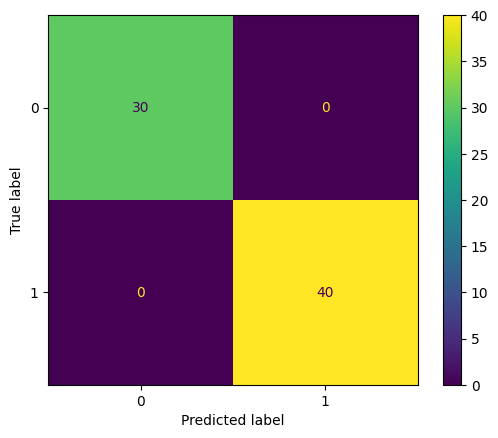

In [18]:
cm = confusion_matrix(y_versicolor_virginica_train, y_pred_arvore_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])

disp.plot()

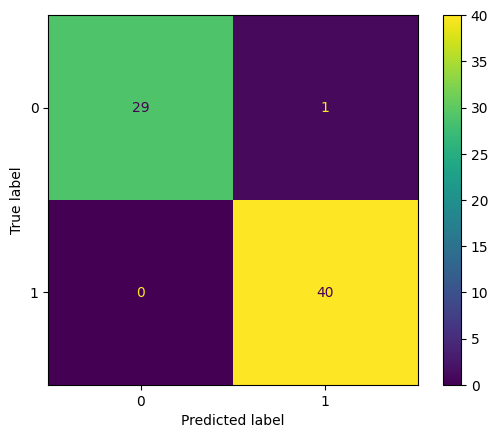

In [19]:
cm = confusion_matrix(y_versicolor_virginica_train, y_pred_regressao_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])

disp.plot()

### Avaliando desempenho conjunto teste

In [20]:
y_pred_arvore_test = arvore_decisao.predict(X_versicolor_virginica_test)
y_pred_regressao_test = regressao_logistica.predict(X_versicolor_virginica_test)

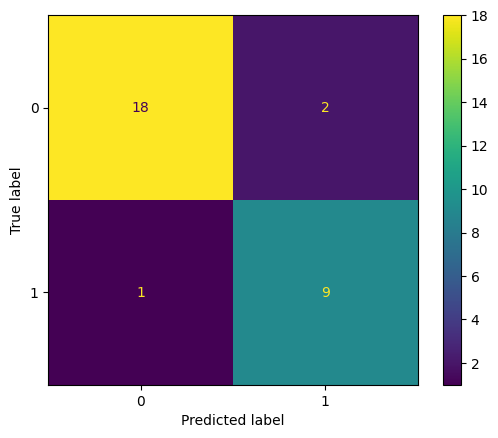

In [21]:
cm = confusion_matrix(y_versicolor_virginica_test, y_pred_arvore_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])

disp.plot()

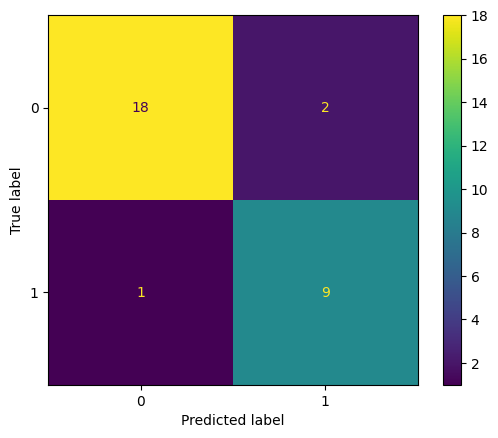

In [22]:
cm = confusion_matrix(y_versicolor_virginica_test, y_pred_regressao_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])

disp.plot()

### A diferença de desempenho é só pelo acaso?

In [23]:
arvore_decisao = DecisionTreeClassifier()
regressao_logistica = LogisticRegression(n_jobs=-1)

scores_arvore_decisao = cross_val_score(arvore_decisao, X_versicolor_virginica, y_versicolor_virginica, cv=4)
scores_regressao_logistica = cross_val_score(regressao_logistica, X_versicolor_virginica, y_versicolor_virginica, cv=4)

In [24]:
print(f"scores arvore_decisao {np.round(scores_arvore_decisao, 2)}, média {scores_arvore_decisao.mean():.2f}, desvio padrao {scores_arvore_decisao.std():.3f}")
print(f"scores regressao_logistica {np.round(scores_regressao_logistica, 2)}, média {scores_regressao_logistica.mean():.2f}, desvio padrao {scores_regressao_logistica.std():.3f}")

scores arvore_decisao [0.96 0.92 0.92 1.  ], média 0.95, desvio padrao 0.033
scores regressao_logistica [0.96 0.96 0.92 0.96], média 0.95, desvio padrao 0.017


### Efeito de bagging na performance

In [25]:
arvore_decisao_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=3)

regressao_logistica_bagging = BaggingClassifier(estimator=LogisticRegression(n_jobs=-1), n_estimators=3)

In [26]:
scores_arvore_decisao_bagging = cross_val_score(arvore_decisao_bagging, X_versicolor_virginica, y_versicolor_virginica, cv=4)
scores_regressao_logistica_bagging = cross_val_score(regressao_logistica_bagging, X_versicolor_virginica, y_versicolor_virginica, cv=4)

In [27]:
print(f"scores arvore_decisao {np.round(scores_arvore_decisao_bagging, 2)}, média {scores_arvore_decisao_bagging.mean():.2f}, desvio padrao {scores_arvore_decisao_bagging.std():.3f}")
print(f"scores regressao_logistica {np.round(scores_regressao_logistica_bagging, 2)}, média {scores_regressao_logistica_bagging.mean():.2f}, desvio padrao {scores_regressao_logistica_bagging.std():.3f}")

scores arvore_decisao [0.96 0.96 0.92 1.  ], média 0.96, desvio padrao 0.028
scores regressao_logistica [0.96 0.96 0.92 0.96], média 0.95, desvio padrao 0.017


## Perguntas

1. Que outros modelos podemos usar?
1. Qual o melhor entre os 2 modelos?
1. Que métricas podemos utilizar para avaliar os modelos?
1. O que acontece se executarmos o split de treino e teste multiplas vezes? Impacta o resultado? Por que?
1. O que acontece se mudarmos o valor de "cv"? Impact o resultado? Por que?
1. O que aconteceu quando adicionamos bagging? Por que os resultados mudam cada vez que executamos o algoritmo?


## Respostas

1. Bagging e Boost.
2. Cada modelo tem suas vantagens e desvantagens, depende da utilização do usuário.
3. Acurácia, Precisão, Recall, F1-Score.
4. Se você ajustar seu modelo com base em um único split específico, pode ocorrer overfitting ao conjunto de teste específico. O modelo pode se ajustar bem a essa divisão particular, mas não generalizar bem para novos dados. Usar múltiplos splits ajuda a mitigar esse problema, pois o modelo é avaliado em diferentes subconjuntos dos dados.
5. Usar um valor maior de cv trás resultados mais precisos, porém custa mais tempo de execução. No caso contrário, abaixando o valor de cv, trás resultados menos precisos numa velocidade maior. Recomenda-se usar cv maiores em conjunto de dados menores, também é válido avaliar o recurso de processamento disponível.
6. Usar mais bagging ajuda a reduzir a variância do modelo. Como os modelos individuais são treinados em diferentes subconjuntos dos dados, suas previsões podem variar.

## Como trabalhar com mais dados? Trabalhando com o MNIST

### Agora é com vocês, como criaram um modelo de classificação para predizer as classes de dígitos, mas informações no [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

In [28]:
digits = load_digits()

<Figure size 640x480 with 0 Axes>

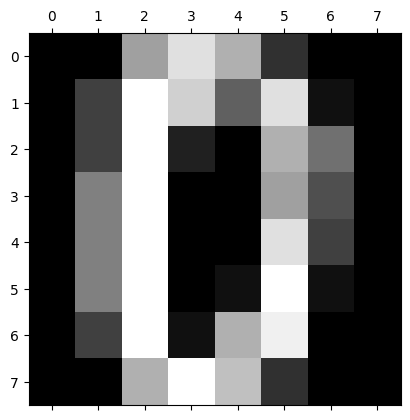

In [29]:
plt.gray()

plt.matshow(digits.images[30])